In [1]:
import talos
r = talos.Reporting('../talos_chrom_5/092519115258.csv')



Using TensorFlow backend.


dropout_rate      0.000000
hidden_neurons   -0.194182
l1_reg            0.283962
l2_reg            0.000000
lr                0.358340
Name: val_acc, dtype: float64


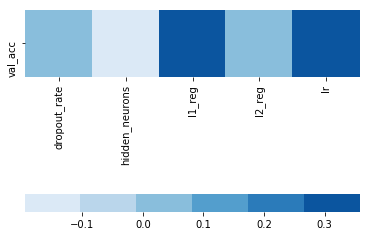

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
r.rounds()
correlations = r.correlate('val_acc', exclude=['round_epochs','epochs','n_snps','loss','val_loss','acc'])
correlations['l2_reg']=0
correlations['dropout_rate']=0

print(correlations)

df = correlations.to_frame().transpose()

grid_kws = {"height_ratios": (.3, .05), "hspace": 1.5}
f, axes = plt.subplots(2, gridspec_kw=grid_kws)

plt.subplots_adjust(top=0.9)
sns.heatmap(df, ax=axes[0],
                cbar_ax=axes[1],
                cmap=sns.color_palette("Blues"),
                square=True,
                cbar_kws=dict(orientation="horizontal"))
#f.savefig('../img/correlation.svg', format='svg')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

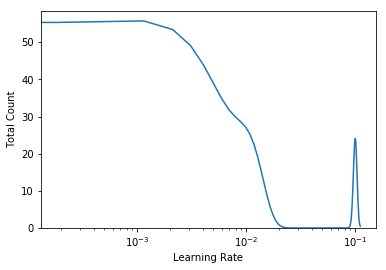

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax = sns.distplot(r.table('val_acc')['lr'],hist=False, ax=ax)
ax.set_xscale('log')
ax.set_ylabel('Total Count')
ax.set_xlabel('Learning Rate')
plt.tight_layout
#fig.savefig('../img/learning_rates.svg', format='svg')

In [12]:
import pandas as pd
import os 

val_acc = 0
cnt = 0
for i in range(1,23):
    try:
        files = os.listdir('../talos_hps/talos_chrom_{}/'.format(i))
        r = talos.Reporting(os.path.join('../talos_hps/talos_chrom_{}/'.format(i),files[0]))
        data = r.table('val_acc', sort_by='val_acc', ascending=False)
        best_row = data[data['acc']>0.80].iloc[0]
        val_acc += best_row['val_acc']
        print('Chrom: {}; Acc: {:.1f} % ; Val_acc: {:.1f} %'.format(i,best_row['acc']*100, best_row['val_acc']*100))
        cnt+=1

    except Exception as e:
        print(e)
        print('No report found for chromosome {}'.format(i))

    
val_acc/=cnt
print('Average max validation accuracy: {}'.format(val_acc))


[Errno 2] No such file or directory: '../talos_hps/talos_chrom_1/'
No report found for chromosome 1
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_2/'
No report found for chromosome 2
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_3/'
No report found for chromosome 3
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_4/'
No report found for chromosome 4
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_5/'
No report found for chromosome 5
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_6/'
No report found for chromosome 6
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_7/'
No report found for chromosome 7
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_8/'
No report found for chromosome 8
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_9/'
No report found for chromosome 9
[Errno 2] No such file or directory: '../talos_hps/talos_chrom_10/'
No report found for chromosome 1

ZeroDivisionError: division by zero

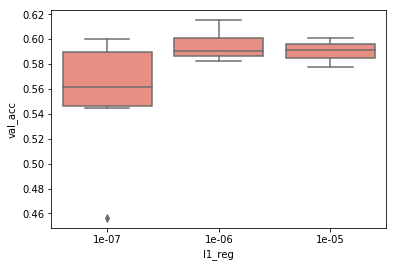

In [14]:
import talos
import seaborn as sns

data = r.table('val_acc', sort_by='val_acc', ascending=False)
data = data[data['acc']>0.80]
ax = sns.boxplot(x='l1_reg', y="val_acc", data=data.reset_index(),color='salmon')


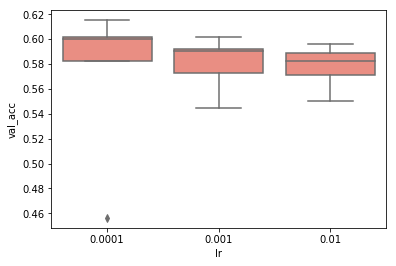

In [15]:
ax2 = sns.boxplot(x='lr', y="val_acc", data=data.reset_index(),color='salmon')


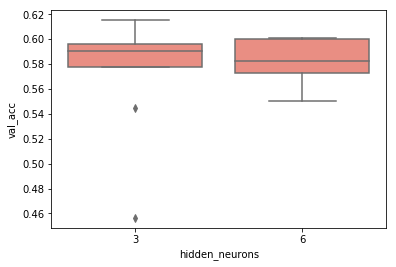

In [16]:
ax3 = sns.boxplot(x='hidden_neurons', y="val_acc", data=data.reset_index(),color='salmon')
